<a href="https://colab.research.google.com/github/shroukdiaa/colab_notebook/blob/main/task2_ml_multiple_linear_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [15]:
data = pd.read_csv('/content/canada_per_capita_income.csv')
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [17]:
data.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [18]:
data.shape

(47, 2)

## Handle Missing Values

In [19]:
data.isnull().sum()

,0
year,0
per capita income (US$),0


In [20]:
# Display the sum of missing values in each column
missing_values = data.isnull().sum()

missing_values[missing_values > 0]

,0


In [21]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_percentage[missing_percentage > 0]

,0


In [26]:
null_sum = data['per capita income (US$)'].isnull().sum()
print(f"Sum of null values in 'per capita income (US$)': {null_sum}")

Sum of null values in 'per capita income (US$)': 0


In [27]:
missing_values = data.isnull().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


# **task2**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [30]:
df = pd.read_csv("canada_per_capita_income.csv")
X = df['year'].values
Y = df['per capita income (US$)'].values

# Normalize X for better performance of gradient descent

In [31]:
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X] # add the bias term

# Initialize parameters


In [32]:
b0 = 0  # y-intercept
b1 = 0  # slope
learning_rate = 0.01
epochs = 1000  # Number of iterations

# Gradient Descent Algorithm


In [37]:
n = len(X)

for _ in range(epochs):
    # Use dot product for matrix multiplication to get predictions
    y_pred = X.dot([b0, b1])
    d_b0 = (-2/n) * np.sum(Y - y_pred)  # Derivative wrt b0
    # Use dot product for matrix multiplication in derivative calculation
    d_b1 = (-2/n) * np.sum((Y - y_pred) * X[:,1])  # Derivative wrt b1, use the feature column
    b0 = b0 - learning_rate * d_b0  # Update b0
    b1 = b1 - learning_rate * d_b1  # Update b1

# Final parameters


In [38]:
print(f"b0 (intercept): {b0}")
print(f"b1 (slope): {b1}")

b0 (intercept): 18920.137031562284
b1 (slope): 11237.84702039731


# Predict for the year 2020

In [39]:
year_2020 = (2020 - df['year'].mean()) / df['year'].std()  # Normalize 2020
predicted_income_2020 = b0 + b1 * year_2020
print(f"Predicted Per Capita Income for 2020: ${predicted_income_2020 * df['per capita income (US$)'].std() + df['per capita income (US$)'].mean()}")


Predicted Per Capita Income for 2020: $494035906.9314918


# Plot the data


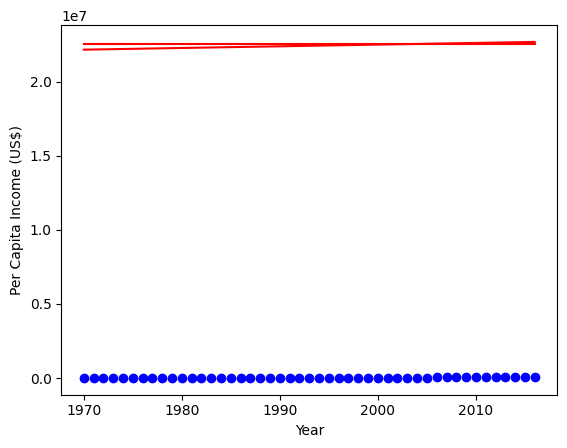

In [40]:
plt.scatter(df['year'], df['per capita income (US$)'], color='blue')
plt.plot(df['year'], b0 + b1 * (X.squeeze() * df['year'].std() + df['year'].mean()), color='red')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.show()